This notebook demonstrates how to train a convolutional neural network model using Keras library.

First of all import all libraries.

In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


Load json file.

In [2]:
f = open(r'../input/shipsnet.json')
dataset = json.load(f)
f.close()

Convert data from list to np.array.

In [3]:
data = np.array(dataset['data']).astype('uint8')
labels = np.array(dataset['labels']).astype('uint8')

View shape of data.

In [4]:
print(data.shape)
print(labels.shape)

(2000, 19200)
(2000,)


Normalize data and transform data for keras model training.

In [5]:
x = data / 255.
x = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

print(x.shape)

(2000, 80, 80, 3)


In [6]:
y = to_categorical(labels, num_classes=2)
print(y.shape)

(2000, 2)


View image and labels.

1279
[ 1.  0.]


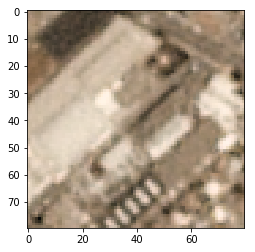

In [7]:
img_id_to_check = np.random.randint(0, x.shape[0] - 1)
im = x[img_id_to_check]

print(img_id_to_check)
print(y[img_id_to_check])

plt.imshow(im)
plt.show()

Create sequential model.

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(80, 80, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

# model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), 
              metrics=['accuracy'])

Train model with 20 % of data used for validation.

In [9]:
history = model.fit(x, y, batch_size=32, epochs=20, validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/20
1600/1600 [==============================] - 75s - loss: 0.4954 - acc: 0.7894 - val_loss: 0.1092 - val_acc: 0.9725
Epoch 2/20
1600/1600 [==============================] - 95s - loss: 0.1349 - acc: 0.9594 - val_loss: 0.0518 - val_acc: 0.9900
Epoch 3/20
1600/1600 [==============================] - 88s - loss: 0.0876 - acc: 0.9769 - val_loss: 0.0265 - val_acc: 0.9950
Epoch 4/20
1600/1600 [==============================] - 87s - loss: 0.1050 - acc: 0.9756 - val_loss: 0.0545 - val_acc: 0.9950
Epoch 5/20
1600/1600 [==============================] - 89s - loss: 0.0647 - acc: 0.9838 - val_loss: 0.0086 - val_acc: 0.9975
Epoch 6/20
1600/1600 [==============================] - 96s - loss: 0.0575 - acc: 0.9825 - val_loss: 0.0249 - val_acc: 0.9950
Epoch 7/20
1600/1600 [==============================] - 105s - loss: 0.0374 - acc: 0.9875 - val_loss: 0.0222 - val_acc: 0.9950
Epoch 8/20
1600/1600 [==============================] - 105s - loss: 0

View model training accuracy graph.

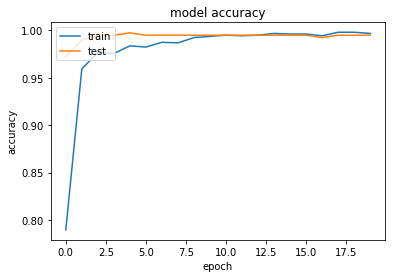

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

View model training loss graph.

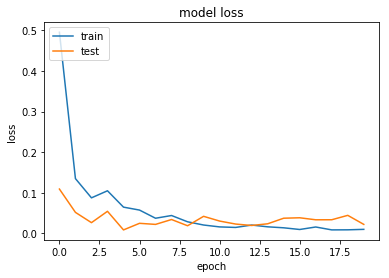

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()